# Exploratory Data Analysis (EDA) on Customers Dataset

This notebook performs step-by-step EDA on the `customers.csv` dataset.
We will explore distributions, correlations, outliers, and customer segmentation.

### 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### 2. Load the Dataset
We load the dataset and preview the first few rows.

In [2]:
df = pd.read_csv("customers.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### 3. Basic Info & Summary Statistics
Checking data types, missing values, and descriptive statistics.

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Interpretation:**  
- All columns are numeric except `Channel` and `Region` which are categorical.  
- Spending values vary widely — some customers spend very little, while others spend tens of thousands.  

### 4. Data Quality Checks
Checking for missing values and duplicates.

In [4]:
print("Missing values:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

Missing values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64
Duplicate rows: 0


**Interpretation:**  
- No missing values → dataset is clean.  
- If duplicates exist, they should be removed to avoid bias.  

### 5. Distribution Analysis
Ploted histograms to see spending distributions.

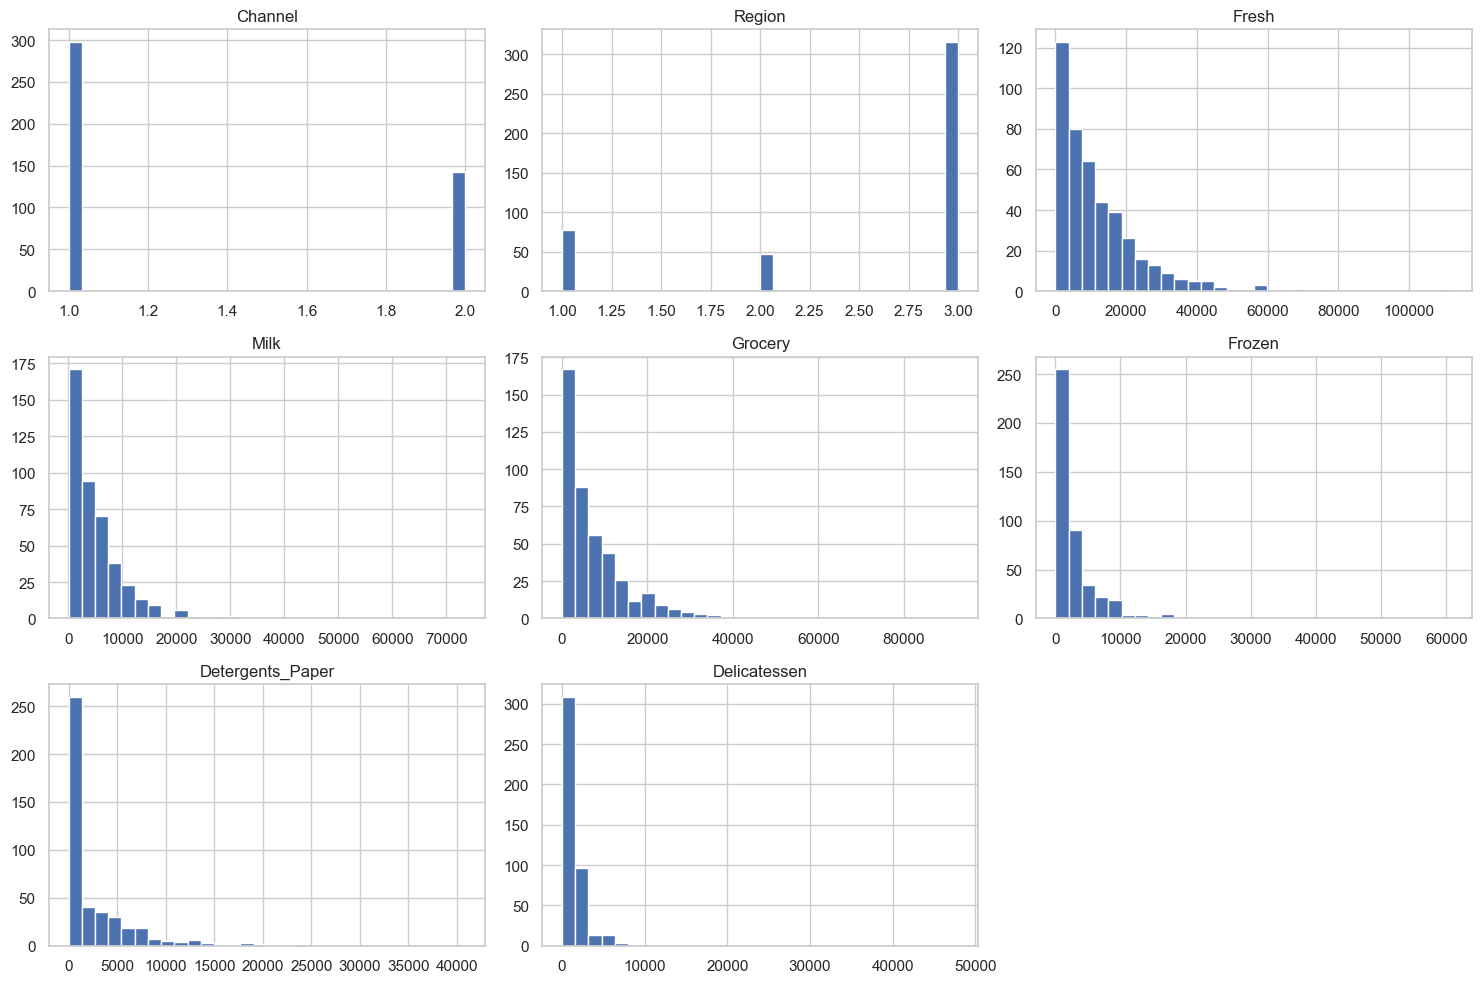

In [5]:
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()

**Interpretation:**  
- Most features are **right-skewed** (many small spenders, few very large spenders).  
- Categories like `Fresh` and `Grocery` have extreme outliers.  

### 6. Outlier Detection
Used boxplots to visualize outliers in spending categories.

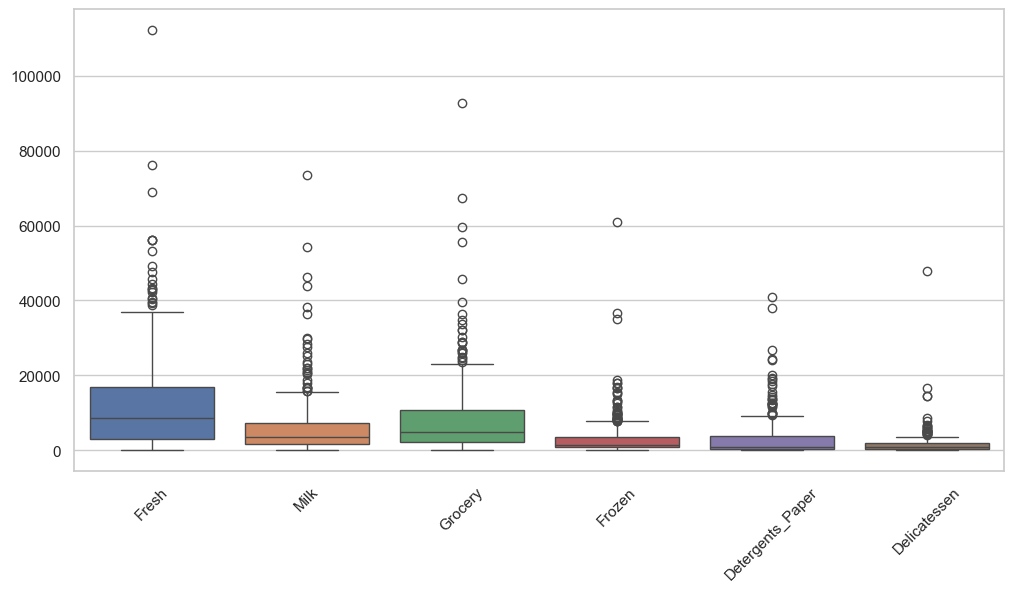

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=['Channel','Region']))
plt.xticks(rotation=45)
plt.show()

**Interpretation:**  
- Boxplots confirm extreme outliers in `Fresh`, `Grocery`, and `Frozen`.  
- These outliers represent very high-spending customers.  

### 7. Correlation Analysis
Checking relationships between product categories.

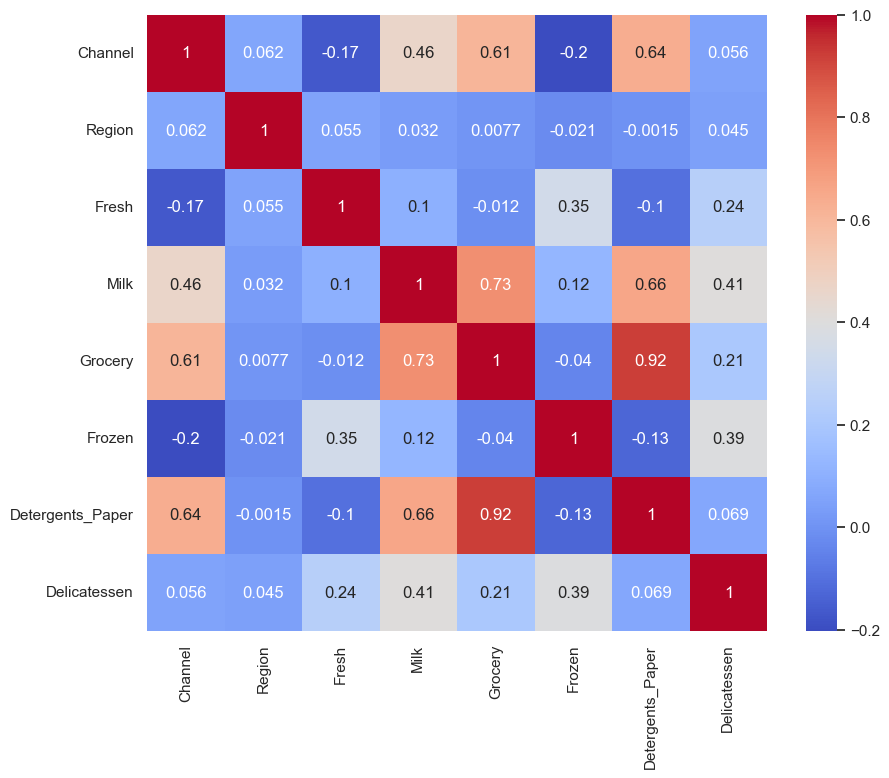

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

**Interpretation:**  
- Strong correlation between `Grocery`, `Milk`, and `Detergents_Paper` → retail-oriented customers.  
- `Fresh` and `Frozen` are less correlated → Horeca (hotels/restaurants/catering).  

### 8. Channel & Region Analysis
Comparing average spending by Channel and Region.

In [8]:
print("Average spend by Channel:\n", df.groupby("Channel").mean())
print("\nAverage spend by Region:\n", df.groupby("Region").mean())

Average spend by Channel:
            Region         Fresh          Milk       Grocery       Frozen  \
Channel                                                                    
1        2.510067  13475.560403   3451.724832   3962.137584  3748.251678   
2        2.612676   8904.323944  10716.500000  16322.852113  1652.612676   

         Detergents_Paper  Delicatessen  
Channel                                  
1              790.560403   1415.956376  
2             7269.507042   1753.436620  

Average spend by Region:
          Channel         Fresh         Milk      Grocery       Frozen  \
Region                                                                  
1       1.233766  11101.727273  5486.415584  7403.077922  3000.337662   
2       1.404255   9887.680851  5088.170213  9218.595745  4045.361702   
3       1.332278  12533.471519  5977.085443  7896.363924  2944.594937   

        Detergents_Paper  Delicatessen  
Region                                  
1            2651.116883 

**Interpretation:**  
- **Channel 1 (Horeca)** → higher spending on `Fresh` and `Frozen`.  
- **Channel 2 (Retail)** → higher spending on `Grocery`, `Milk`, and `Detergents_Paper`.  

### 9. Pairplot
Visualizing relationships between features.

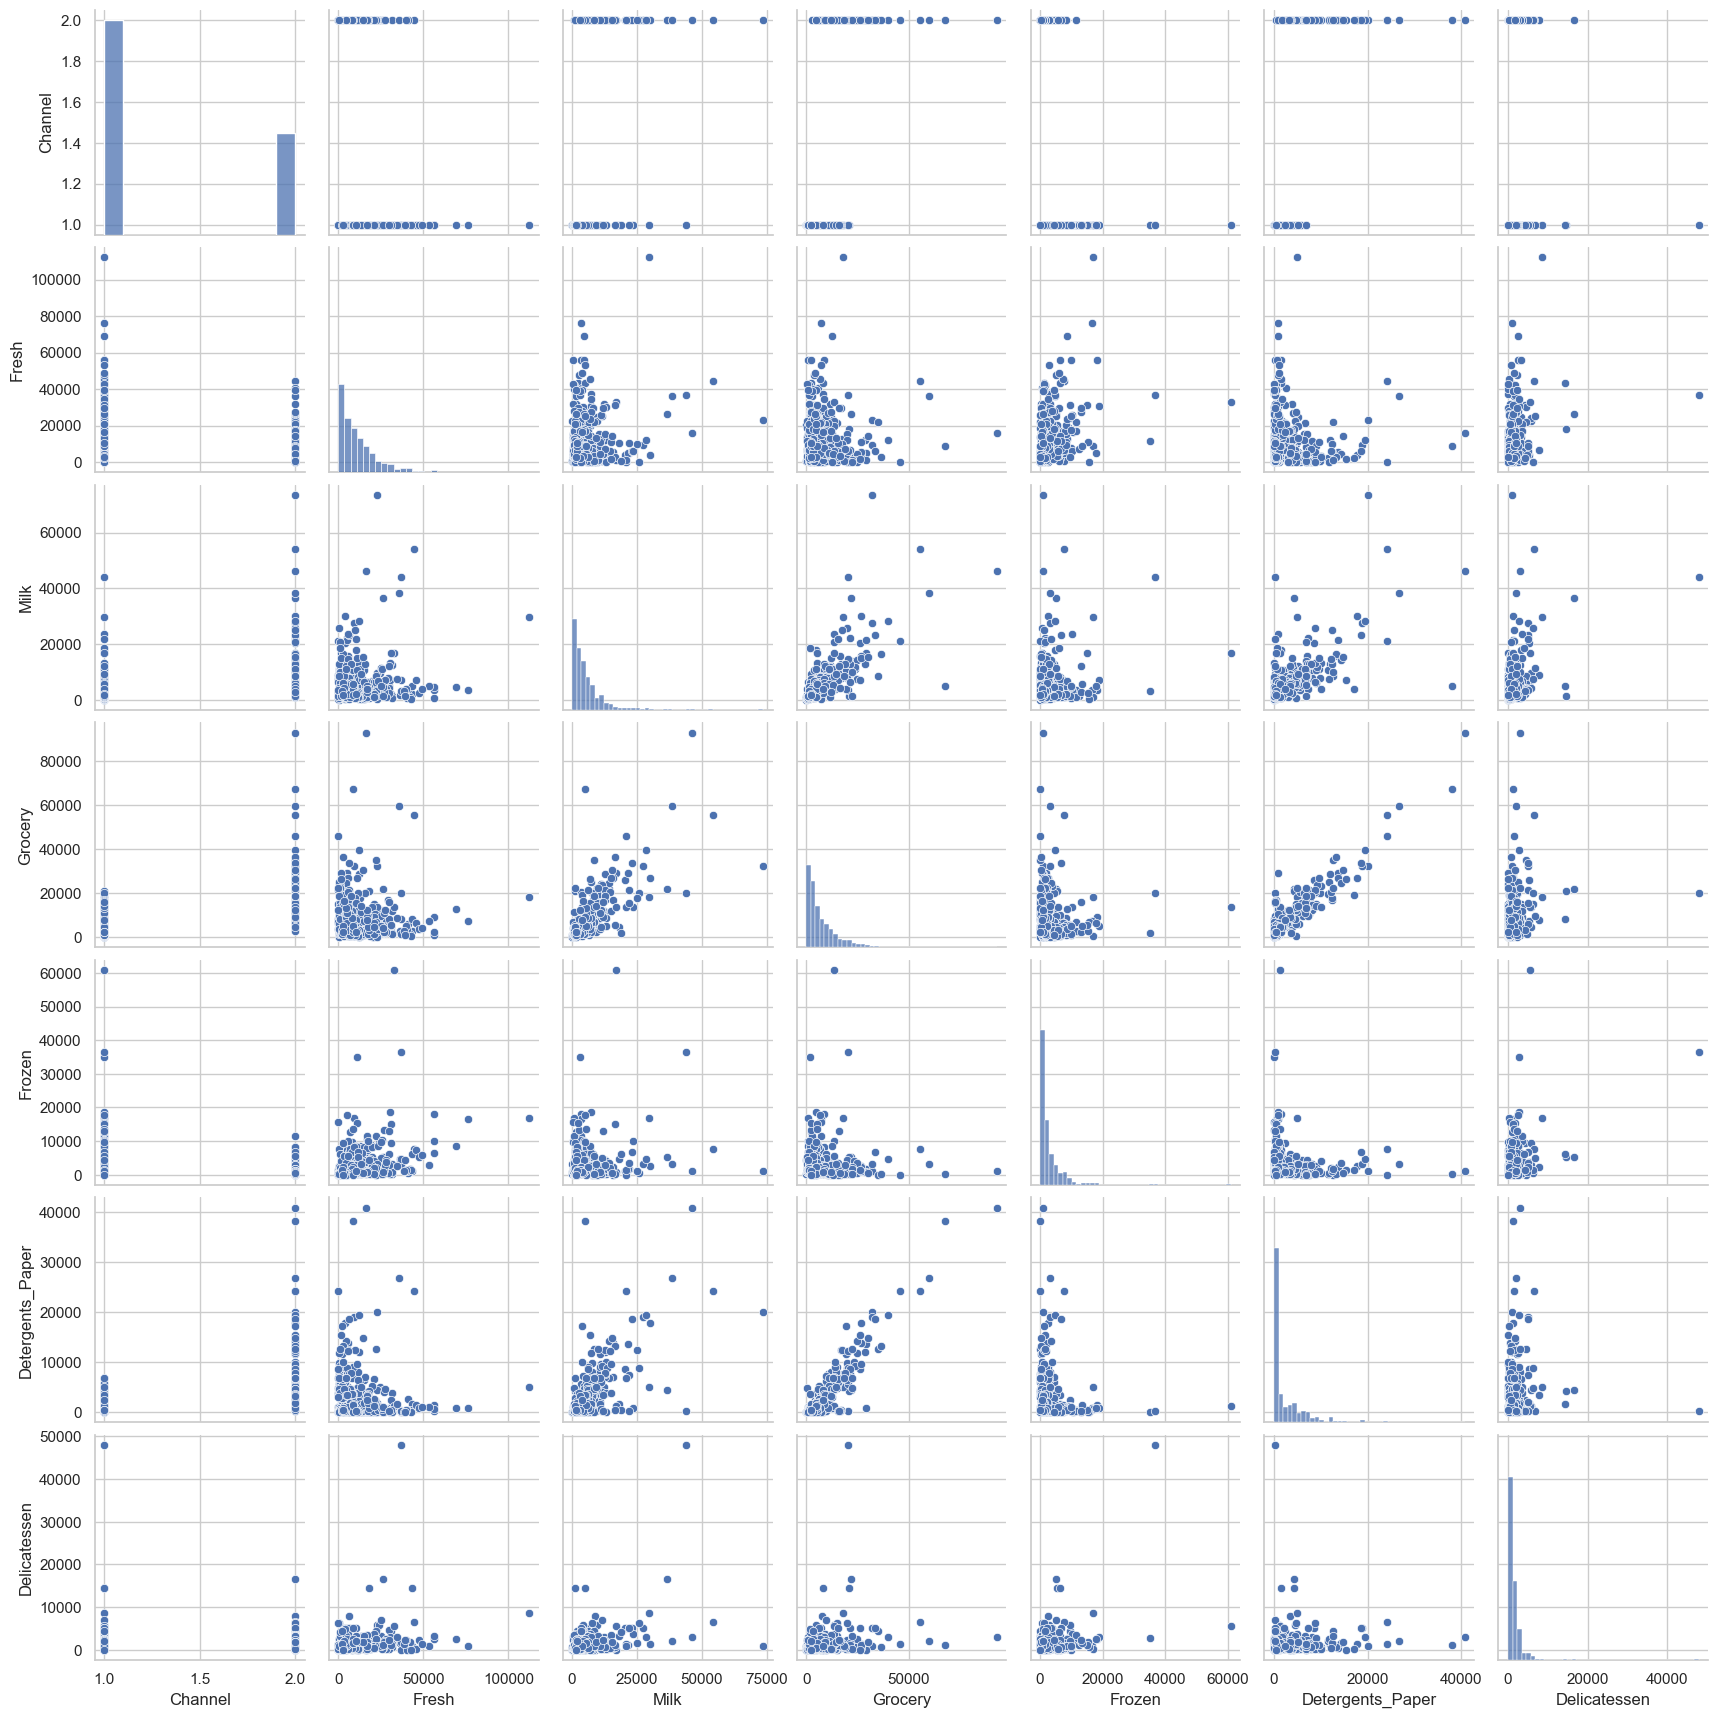

In [9]:
sns.pairplot(df.drop(columns=['Region']))
plt.show()

**Interpretation:**  
- Scatter plots show clusters forming naturally.  
- Retail customers cluster around high `Grocery` and `Detergents_Paper`.  

### 10. PCA (Dimensionality Reduction)
Reduced dimensions to 2 principal components for visualization.

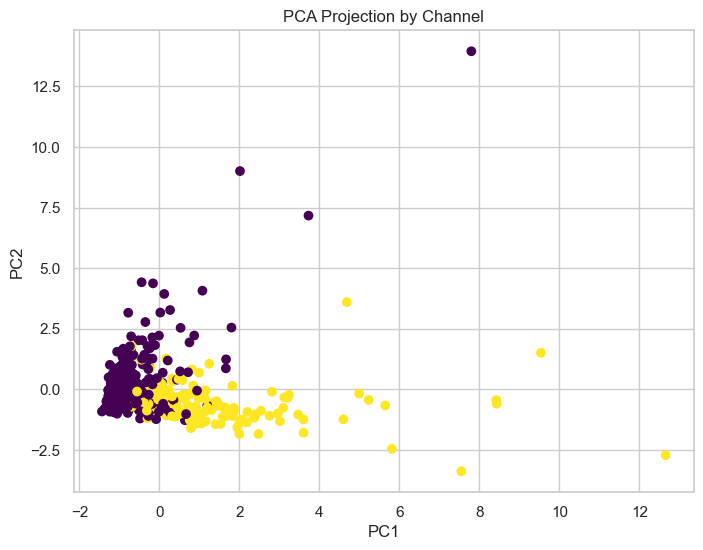

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop(columns=['Channel','Region'])
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Channel'], cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection by Channel")
plt.show()

**Interpretation:**  
- PCA reduces the dataset to 2D.  
- Clear separation between Channel 1 and Channel 2 customers.  

### 11. K-Means Clustering
Clustered customers into segments and visualize.

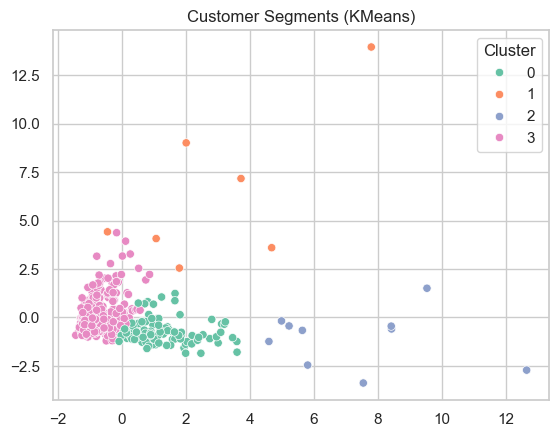

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette="Set2")
plt.title("Customer Segments (KMeans)")
plt.show()

**Interpretation:**  
- K-Means groups customers into 4 clusters.  
- Each cluster represents a different spending pattern (e.g., Horeca-heavy, Retail-heavy, balanced, or outlier spenders).  

### Insights
- Spending distributions are skewed with many small spenders and few large ones.
- Retail customers (Channel 2) spend more on Grocery, Milk, Detergents.
- Horeca customers (Channel 1) spend more on Fresh and Frozen.
- PCA and clustering reveal natural customer segments.